Mounting Drive


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection And Analysis

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/1.01. Simple linear regression.csv')

In [5]:
dataset.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [7]:
dataset.tail()

,SAT,GPA
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76
83,2050,3.81


In [8]:
dataset.shape

(84, 2)

In [9]:
dataset.columns

Index(['SAT', 'GPA'], dtype='object')

In [10]:
dataset.info

<bound method DataFrame.info of      SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]>

In [11]:
dataset.describe

<bound method NDFrame.describe of      SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]>

In [12]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

Splitting Dataset

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(84, 1) (58, 1) (26, 1)


Training The Model

In [15]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Checking The Coefficient And Intercept

In [16]:
print("b=",regressor.coef_)
print("a =",regressor.intercept_)

b= [0.00170771]
a = 0.16251091768368786


Data Visualization

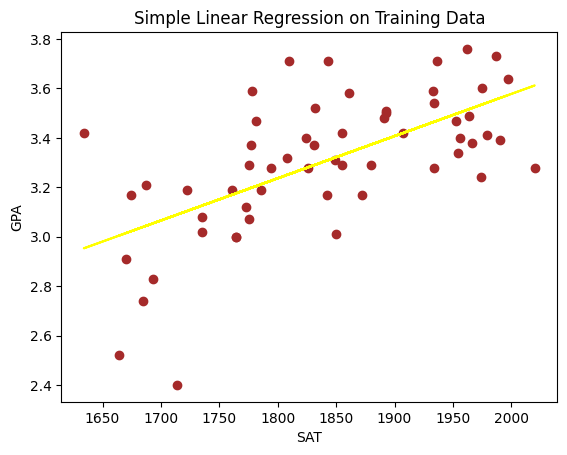

In [28]:
plt.scatter(X_train,y_train,color='brown')
plt.plot(X_train,regressor.predict(X_train),color='yellow')
plt.title("Simple Linear Regression on Training Data")
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()

In [20]:
y_pred = regressor.predict(X_test)

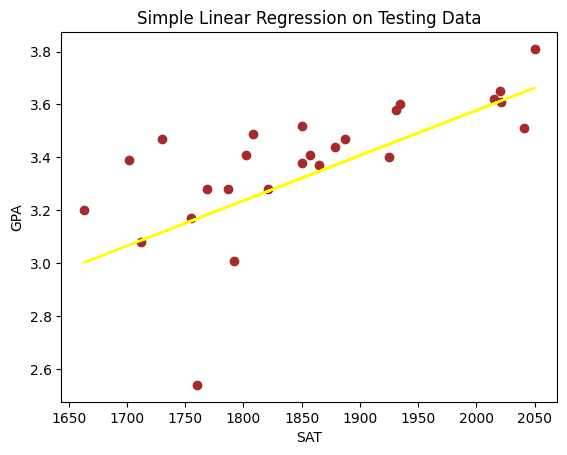

In [29]:
plt.scatter(X_test,y_test,color='brown')
plt.plot(X_test,y_pred,color='yellow')
plt.title("Simple Linear Regression on Testing Data")
plt.xlabel("SAT")
plt.ylabel("GPA")
plt.show()

Model Evaluation

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.13329473269292533
MSE: 0.03635217622290396
RMSE: 0.1906624667387474


Saving The Trained Model

In [23]:
import pickle

In [24]:
#saving our trained model
filename = 'GPA_PREDICTION.sav'
pickle.dump(regressor, open(filename, 'wb'))

Loading The Saved Model Into A File

In [25]:
# loading the saved model
loaded_model = pickle.load(open('GPA_PREDICTION.sav', 'rb'))